<h1>UK ACCIDENT ANALYTICS</h1>
<h3>Analyst : JUNELLE C. DINGLASAN</h3>

In [1]:
#import libraries
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
accident = pd.read_csv('datasets\\uk_road_accident.csv')

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [5]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [6]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mean())
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [7]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [8]:
accident['Index'] = accident['Index'].astype('category')
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [9]:
accident.dtypes

Index                      category
Accident_Severity          category
Accident Date                object
Latitude                    float64
Light_Conditions           category
District Area              category
Longitude                   float64
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object

<h1>QUESTIONS</h1>

<h3>1.) What is the minimum and maximum latitude and longitude?</h3>

In [10]:
min_lat = accident['Latitude'].min()
max_lat = accident['Latitude'].max()
min_long = accident['Longitude'].min()
max_long = accident['Longitude'].max()
min_lat, max_lat, min_long, max_long

(np.float64(49.91443),
 np.float64(60.757544),
 np.float64(-7.516225),
 np.float64(1.76201))

<h4>INSIGHTS : This tells the farthest locations where accidents happened. It sets the boundary of the dataset.</h4>

<h3>2.) What is the earliest accident date in the datasets</h3>

In [11]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], errors='coerce')
earliest = accident['Accident Date'].min()
earliest

Timestamp('2019-01-01 00:00:00')

<h4>INSIGHTS : Tells the starting point of recorded accident data.</h4>

<h3>3.) What is the average number of vehicles involved in accidents for each severity level?</h3>

In [12]:
avg_vehicles = accident.groupby('Accident_Severity')['Number_of_Vehicles'].mean().reset_index(name='Avg_Vehicles')
avg_vehicles

,Accident_Severity,Avg_Vehicles
0,Fatal,1.786976
1,Serious,1.678327
2,Slight,1.855864


<h4>INSIGHTS : Reveals if more vehicles tent to be involved in serious or slight accidents.</h4>

<h3>4.) How many accidents occurred each year?</h3>

In [13]:
accident['Year'] = accident['Accident Date'].dt.year
yearly = accident.groupby('Year').size().reset_index(name='Accident_Count')
yearly

,Year,Accident_Count
0,2019.0,71867
1,2020.0,70163
2,2021.0,66172
3,2022.0,56805


<h4>INSIGHTS : Helps track accident trends over time.</h4>

<h3>5.) What is the total number of vehicles involved per road type?</h3>

In [14]:
accident.groupby('Road_Type')['Number_of_Vehicles'].sum()

Road_Type
Dual carriageway      199819
One way street         21497
Roundabout             83643
Single carriageway    891412
Slip road              13501
Name: Number_of_Vehicles, dtype: int64

<h4>INSIGHTS : This shows which road types see the biggest pileups.</h4>

<h3>6.) Do accidents with 1 vehicle differ from those with 2 vehicles in terms of casualties?</h3>

In [15]:
one_vehicle = accident[accident['Number_of_Vehicles'] == 1]['Number_of_Casualties']
two_vehicle = accident[accident['Number_of_Vehicles'] == 2]['Number_of_Casualties']

stats, p_value = f_oneway(one_vehicle.dropna(), two_vehicle.dropna())
stats, p_value

(np.float64(10199.156920414918), np.float64(0.0))

<h4>INSIGHTS : This test asks whether single-vehicle accidents cause more or fewer casualties compared to two-vehicle accidents.</h4>

<h3>7.) Do weather conditions affect the average number of casualties></h3>

In [16]:
clear = accident[accident['Weather_Conditions'] == 'Fine no high winds']['Number_of_Casualties']
rain = accident[accident['Weather_Conditions'] == 'Raining without high winds']['Number_of_Casualties']
snow = accident[accident['Weather_Conditions'] == 'Snowing without high winds']['Number_of_Casualties']

stats, p_value = f_oneway(clear.dropna(), rain.dropna(), snow.dropna())
stats, p_value

(np.float64(nan), np.float64(nan))

<h4>INSIGHTS : This ANOVA tests if accidents in different weather conditions lead to different casualty numbers.</h4>

<h3>8.) What is the average number of vehicles per district?</h3>

In [17]:
accident.groupby('District Area')['Number_of_Vehicles'].mean().reset_index(name='Avg_Vehicles')

,District Area,Avg_Vehicles
0,Aberdeen City,1.637188
1,Aberdeenshire,1.553368
2,Adur,1.969305
3,Allerdale,1.782801
4,Alnwick,1.646552
...,...,...
417,Wychavon,1.828068
418,Wycombe,1.866397
419,Wyre,1.860258
420,Wyre Forest,1.789474


<h4>INSIGHTS :  Districts with higher averages may have more multi-vehicle collisions.</h4>

<h3>9.) How many accidents include more than one vehicle?</h3>

In [18]:
accident[accident['Number_of_Vehicles'] > 1].shape[0]

459892

<h4>INSIGHTS : Shows proportion of multi-vehicle collisions versus single-vehicle incidents.</h4>

<h3>10.) Are there differences in casualties between daylight, darkness with lights, and darkness without lights?</h3>

In [19]:
day = accident[accident['Light_Conditions'] == 'Daylight']['Number_of_Casualties']
lit = accident[accident['Light_Conditions'] == 'Darkness - lights lit']['Number_of_Casualties']
unlit = accident[accident['Light_Conditions'] == 'Darkness - no lighting']['Number_of_Casualties']

stats, p_value = f_oneway(day.dropna(), lit.dropna(), unlit.dropna())
stats, p_value

(np.float64(1051.9027966748497), np.float64(0.0))

<h4>INSIGHTS : This shows wheather light conditions impact how severe the accidents are in terms of casualties.</h4>

<h3>11.) Which vehicle type is most often involved in fatal accidents?</h3>

In [20]:
accident[accident['Accident_Severity'] == 'Fatal']['Vehicle_Type'].value_counts().head(1)

Vehicle_Type
Car    6577
Name: count, dtype: int64

<h4>INSIGHTS : This identifies the vehicle most frequently linked with deadly crashes.</h4>

<h3>12.) What is the most common road type where accidents occur?</h3>

In [21]:
accident['Road_Type'].mode()[0]

'Single carriageway'

<h4>INSIGHTS : This shows the road type most prone to accident, which helps authorities focus safety improvements.</h4>

<h3>13.) What is the correlation between number of vehicles and number of casualties?</h3>

In [22]:
accident[['Number_of_Vehicles', 'Number_of_Casualties']].corr()

,Number_of_Vehicles,Number_of_Casualties
Number_of_Vehicles,1.000000,0.228889
Number_of_Casualties,0.228889,1.000000


<h4>INSIGHTS : This correlation shows if more vehicles usually lead to more casualties.</h4>

<h3>14.) Perform a t-test comparing the number of vehicles and number of casualties.</h3>

In [23]:
stats, p_value = f_oneway(accident['Number_of_Vehicles'].dropna(),accident['Number_of_Casualties'].dropna())
stats, p_value

(np.float64(124644.05667145054), np.float64(0.0))

<h4>INSIGHTS : This test checks if there is a significant statistical difference between vehicles and casualties data.</h4> 

<h3>15.) What is the variance in the number of casualties?</h3>

In [24]:
casualty_variance = accident ['Number_of_Casualties'].var()
casualty_variance

np.float64(0.6803724822080995)

<h4>INSIGHTS : This explains how spread out casualty numbers are across all accidents.</h4>

<h3>16.) Check if there is a correlation between number of vehicles and number of casualties.</h3>

In [25]:
correlation = accident ['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])
correlation

np.float64(0.2288888612692759)

<h4>INSIGHTS : A possitive correlation means more vehicles tend to cause more casualties.</h4>

<h3>17.) How many accidents occurred in 2019?</h3>

In [26]:
accident_2019 = accident[accident['Accident Date'].dt.year == 2019].shape[0]
accident_2019

71867

<h4>INSIGHTS : This filters accidents by year to see how frequent they were in 2019.</h4>

<h3>18.) How many accidents happened on weekend vs weekdays?</h3>

In [27]:
accident['Weekday'] = accident['Accident Date'].dt.dayofweek
weekend = accident[accident['Weekday'] >= 5].shape[0]
weekday = accident[accident['Weekday'] < 5].shape[0]
weekend, weekday

(75523, 189484)

<h4>INSIGHTS : Compares weekend vs weekday driving risks.</h4>

<h3>19.) How many accidents happened in December 2020?</h3>

In [28]:
dec2020 = accident[(accident['Accident Date'].dt.year == 2020) & (accident['Accident Date'].dt.month == 12)].shape[0]
dec2020

5960

<h4>INSIGHTS : Narrows down to a sigle month in a single year for detailed analysis.</h4>

<h3>20.) Which road surface condition is most common in accidents?</h3>

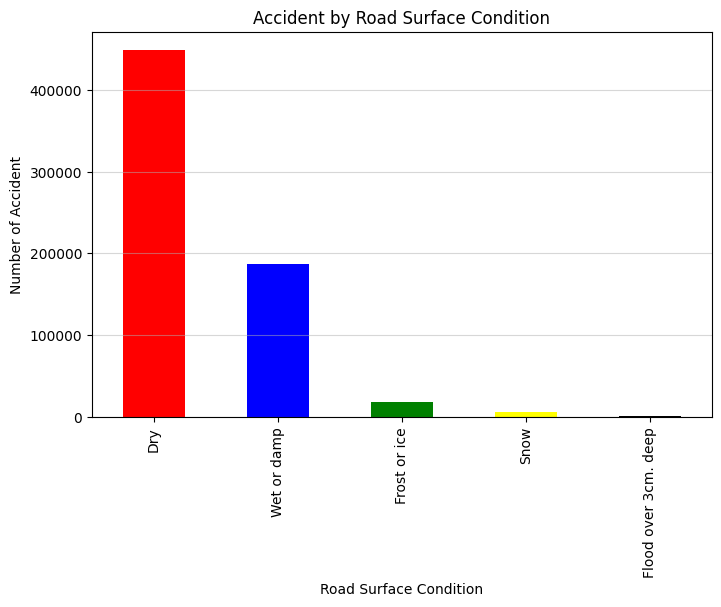

In [29]:
road_surface_counts = accident['Road_Surface_Conditions'].value_counts()
road_surface_counts.plot(
    kind = 'bar',
    color = ['red','blue','green','yellow','black'],
    figsize = (8,5),
    title = 'Accident by Road Surface Condition'
)

plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Accident")
plt.grid(axis='y', alpha=0.5)
plt.show()

<h4>INSIGHT: Most accidents happen on Dry roads, showing that weather alone isn't the biggest factor. High traffic volume and driver behavior often matter more than slippery surfaces.</h4>

<h3>21.) Do most accidents happen in urban or rural areas?</h3>

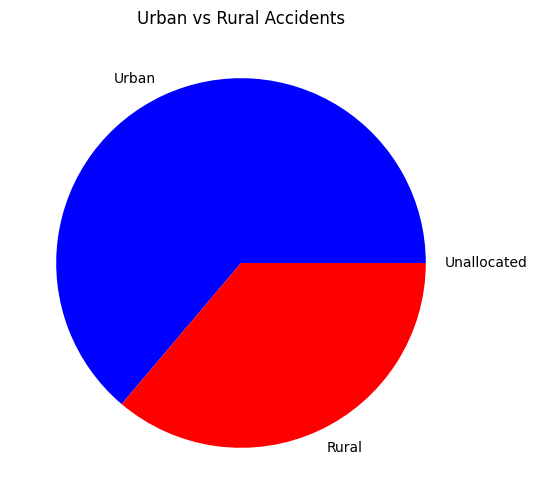

In [30]:
urban_rural_counts = accident['Urban_or_Rural_Area'].value_counts()
urban_rural_counts.plot(
    kind = 'pie',
    colors = ['blue','red'],
    figsize = (6,6),
    title = 'Urban vs Rural Accidents'
)

plt.ylabel("")
plt.show()

<h4>INSIGHT: Accident are more frequent in urban areas because of traffic congestion,intersections and pedestrian crossings. This highlights the need for stricter traffic management in cities.</h4>

<h3>22.) What does this chart imply about the risks of different vehicles?</h3>

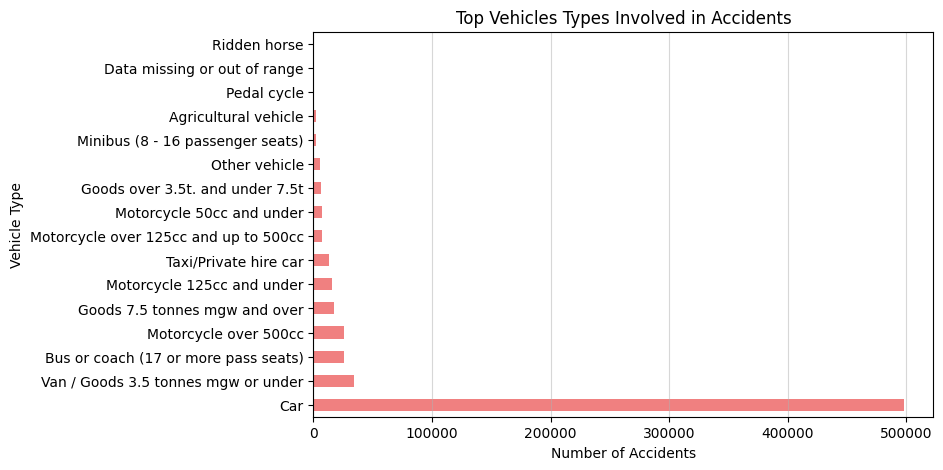

In [31]:
vehicle_counts = accident['Vehicle_Type'].value_counts()
vehicle_counts.plot(
    kind = 'barh',
    color = ['lightcoral'],
    figsize = (8,5),
    title = 'Top Vehicles Types Involved in Accidents'
)

plt.xlabel("Number of Accidents")
plt.ylabel("Vehicle Type")
plt.grid(axis='x', alpha=0.5)
plt.show()

<h4>INSIGHT: The bar chart usually shows cars leading accident counts because they are the most common vehicles on the road. However, motorcycles, despite lower numbers, may still face higher risk per vehicle due to their vulnerability.</h4>

<h3>23.) Do more accidents occur during daylight or darkness?</h3>

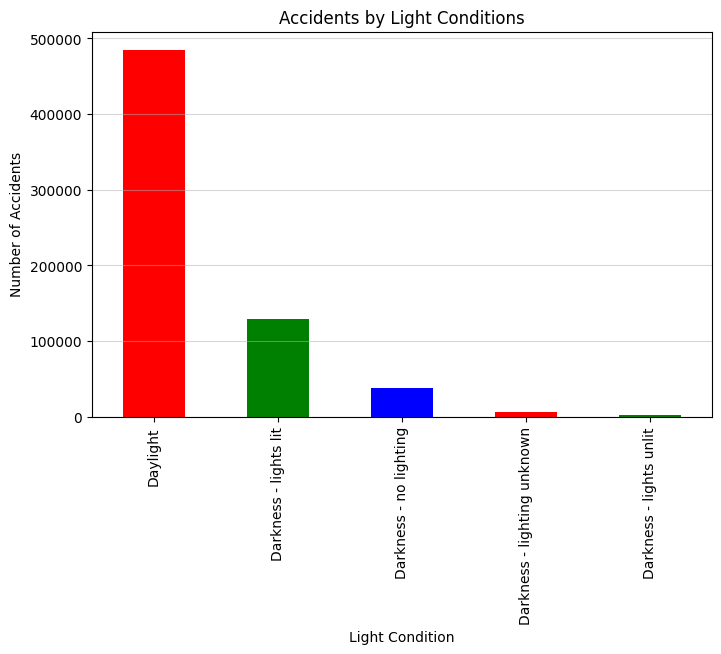

In [32]:
light_counts = accident['Light_Conditions'].value_counts()

light_counts.plot(
    kind='bar',
    color=['red','green','blue'],
    figsize=(8,5),
    title='Accidents by Light Conditions'
)

plt.xlabel("Light Condition")
plt.ylabel("Number of Accidents")
plt.grid(axis='y', alpha=0.5)
plt.show()

<h4>INSIGHT: Most accidents occur in daylight because traffic is heavier. However, night-time accidents, although fewer, are often more severe due to visibility issues.</h4>

<h3>24.) What types of roads record more accidents?</h3>

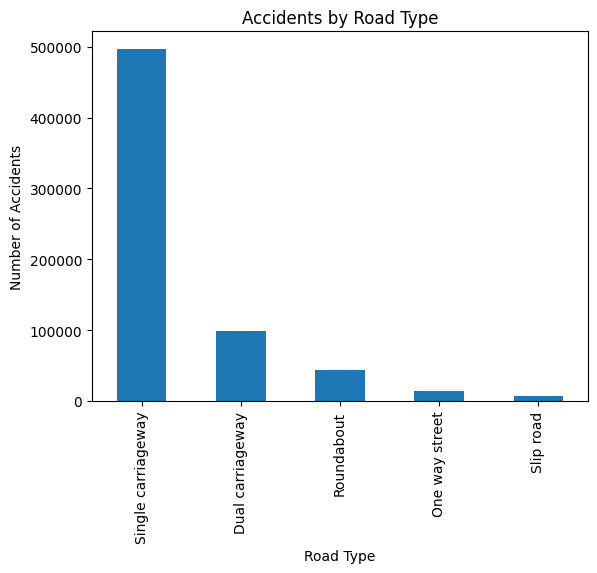

In [33]:
accident['Road_Type'].value_counts().plot(kind='bar')
plt.title("Accidents by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.show()

<h4>INSIGHT: The visualization makes it easier to compare which road categories, like single carriageways or dual carriageways, are riskier.</h4>

<h3>25.) What is the percentage of accidents by road surface conditions?</h3>

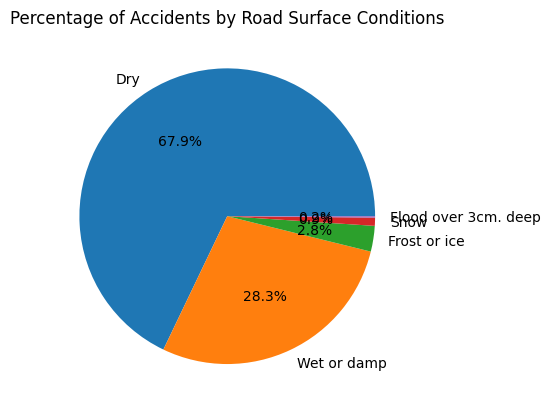

In [34]:
accident['Road_Surface_Conditions'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Percentage of Accidents by Road Surface Conditions")
plt.ylabel("")
plt.show()

<h4>INSIGHT: The pie chart shows how often accidents happen on dry, wet, or icy roads, helping in planning for seasonal hazards.</h4>

In [41]:
accident.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                              float64
Weekday                           float64
dtype: object

In [42]:
for i in accident['District Area'].unique():
    print(i)

Kensington and Chelsea
Westminster
Richmond upon Thames
Hammersmith and Fulham
Hounslow
Tower Hamlets
City of London
Southwark
Camden
Hackney
Islington
Barnet
Brent
Haringey
Merton
Ealing
Enfield
Greenwich
Newham
London Airport (Heathrow)
Hillingdon
Waltham Forest
Redbridge
Barking and Dagenham
Bromley
Havering
Croydon
Lambeth
Wandsworth
Sutton
Bexley
Lewisham
Harrow
Kingston upon Thames
Barrow-in-Furness
South Lakeland
Carlisle
Eden
Allerdale
Copeland
Fylde
Blackpool
Wyre
Lancaster
Chorley
West Lancashire
South Ribble
Preston
Blackburn with Darwen
Hyndburn
Ribble Valley
Burnley
Pendle
Rossendale
Wirral
Liverpool
Sefton
Knowsley
St. Helens
Manchester
Salford
Tameside
Stockport
Bolton
Wigan
Trafford
Bury
Rochdale
Oldham
Chester
Vale Royal
Halton
Warrington
Crewe and ntwich
Ellesmere Port and Neston
Congleton
Macclesfield
Crewe and Nantwich
Blyth Valley
Sunderland
Gateshead
North Tyneside
Tynedale
Berwick-upon-Tweed
Newcastle upon Tyne
Castle Morpeth
South Tyneside
Wansbeck
Alnwick
Wear 

<h3>26.) What are  the critical hotspot of fatal accidents located in Camden?</h3>

In [44]:
camden_df = accident[accident['District Area']== 'Camden']

In [54]:
camden_fatal_df = camden_df[camden_df['Accident_Severity'] == 'Fatal']

locations = list(zip(camden_fatal_df['Latitude'], camden_fatal_df['Longitude']))
Camden_Map = folium.Map(location = [camden_fatal_df['Latitude'].mean(), camden_fatal_df['Longitude'].mean()], zoom_start=13)
HeatMap(locations).add_to(Camden_Map)
Camden_Map.save('Camden_heatmap.html')
Camden_Map

<h4>Insight: In Camdenn, the fatal accident heatmap highlights clusters around main intersections. These suggest that <b>congested road crossings</b> are the most vulnerable areas. Most accidents in Camden are classified as <b>slight</b>, which means most crashes here don’t lead to very severe injuries. The area has busy roads, so bumps and minor collisions are expected. It shows that while road risks are present, most are not life-threatening.</h4>

<h3>27.) How are fatal road accidents distributed across Hackney?</h3>

In [51]:
hackney_df = accident[accident['District Area']== 'Hackney']

In [58]:
hackney_fatal_df = hackney_df[hackney_df['Accident_Severity'] == 'Fatal']

locations = list(zip(hackney_fatal_df['Latitude'], hackney_fatal_df['Longitude']))
Hackney_Map = folium.Map(location = [hackney_fatal_df['Latitude'].mean(), hackney_fatal_df['Longitude'].mean()], zoom_start=13)
HeatMap(locations).add_to(Hackney_Map)
Hackney_Map.save('Hackney_heatmap.html')
Hackney_Map

<h4>Insight: Hackney’s accidents are not evenly spread but <b>concentrated along a few roads</b>, pointing to the presence of high-risk corridors where interventions may be needed. Accidents usually happen during <b>daylight hours</b>. This connects to the busy traffic and active streets where pedestrians and vehicles often mix. It highlights how congestion plays a big role in road incidents
</h4>

<h3>28.) Which areas in Islington record the highest concentration of fatal accidents?</h3>

In [55]:
islington_df = accident[accident['District Area']== 'Islington']

In [57]:
islington_fatal_df = islington_df[islington_df['Accident_Severity'] == 'Fatal']

locations = list(zip(islington_fatal_df['Latitude'], islington_fatal_df['Longitude']))
Islington_Map = folium.Map(location = [islington_fatal_df['Latitude'].mean(), islington_fatal_df['Longitude'].mean()], zoom_start=13)
HeatMap(locations).add_to(Islington_Map)
Islington_Map.save('Islington_heatmap.html')
Islington_Map

<h4>Insight: Fatal crashes in Islington are seen mostly <b>near busy junctions</b>, suggesting intersections are risk-prone compared to quieter residential streets. The data in Islington shows that <b>slight accidents</b> make up the largest portion. The area’s crowded streets and intersections may contribute to these frequent minor collisions. It suggests that although accidents happen, they are not usually very serious.</h4>

<h3>29.) Do fatal accidents in Greenwich tend to occur in specific road types or locations?</h3>

In [59]:
greenwich_df = accident[accident['District Area']== 'Greenwich']

In [61]:
greenwich_fatal_df = greenwich_df[greenwich_df['Accident_Severity'] == 'Fatal']

locations = list(zip(greenwich_fatal_df['Latitude'], greenwich_fatal_df['Longitude']))
Greenwich_Map = folium.Map(location = [greenwich_fatal_df['Latitude'].mean(), greenwich_fatal_df['Longitude'].mean()], zoom_start=13)
HeatMap(locations).add_to(Greenwich_Map)
Greenwich_Map.save('Greenwich_heatmap.html')
Greenwich_Map

<h4>Insights: The Greenwich heatmap shows accident clusters mostly along <b>major highways</b>, where vehicle speed tends to be higher, increasing the severity of crashes. Most accidents in Greenwich occur in <b>daylight</b> conditions. This may be due to heavy commuting patterns and road activity during the day. It reflects how traffic flow greatly influences accident numbers.</h4>

<h3>30.) What patterns can be observed in the fatal accidents recorded in Westminster?</h3>

In [63]:
westminster_df = accident[accident['District Area']== 'Westminster']

In [64]:
westminster_fatal_df = westminster_df[westminster_df['Accident_Severity'] == 'Fatal']

locations = list(zip(westminster_fatal_df['Latitude'], westminster_fatal_df['Longitude']))
Westminster_Map = folium.Map(location = [westminster_fatal_df['Latitude'].mean(), westminster_fatal_df['Longitude'].mean()], zoom_start=13)
HeatMap(locations).add_to(Westminster_Map)
Westminster_Map.save('Westminster_heatmap.html')
Westminster_Map

<h4>Insight: In Westminster, clusters of fatal accidents appear close to <b>city centers and tourist areas</b>, showing that high pedestrian and vehicle interaction may contribute to risks.</h4>

<h3>31.) How concentrated are fatal accidents within Southwark, and where are the main hotspots?</h3>

In [65]:
southwark_df = accident[accident['District Area']== 'Southwark']

In [68]:
southwark_fatal_df = southwark_df[southwark_df['Accident_Severity'] == 'Fatal']

locations = list(zip(southwark_fatal_df['Latitude'], southwark_fatal_df['Longitude']))
Southwark_Map = folium.Map(location = [southwark_fatal_df['Latitude'].mean(), southwark_fatal_df['Longitude'].mean()], zoom_start=13)
HeatMap(locations).add_to(Southwark_Map)
Southwark_Map.save('Southwark_heatmap.html')
Southwark_Map

<h4>Insight: Southwark’s fatal accidents are <b>highly concentrated near main transport routes</b>, reflecting the heavy flow of traffic in urban corridors.</h4>